<h2 align="center">Taking the knowledge I learned from 365 Data Science course in udemy, I have created a simple Linear Regression model that predicts the Salary based on the years of experience of an employee. Dataset downloaded from kaggle.com</h2> 


In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Salary.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.describe(include="all")

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

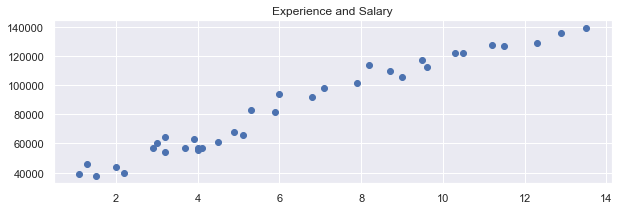

In [5]:
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize =(10,3))
ax1.scatter(data['YearsExperience'],data['Salary'])
ax1.set_title('Experience and Salary')


plt.show()

In [6]:
inputs = data["YearsExperience"]
targets = data["Salary"]

In [7]:
inputs.shape

(35,)

In [8]:
x_matrix = inputs.values.reshape(-1, 1)
x_matrix.shape

(35, 1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_matrix, targets, test_size=0.2, random_state=365)

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
reg.coef_

array([8860.25721723])

In [12]:
reg.intercept_

28185.840367422723

In [13]:
reg.score(x_train,y_train)

0.963106472553385

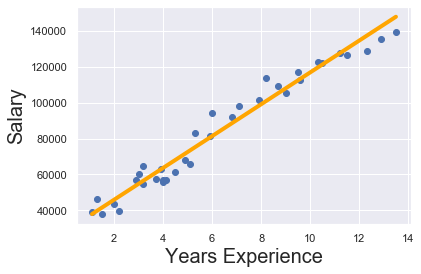

In [14]:
plt.scatter(inputs,targets)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(inputs,yhat, lw=4, c="orange", label = "regression line")
plt.xlabel("Years Experience", fontsize = 20)
plt.ylabel("Salary", fontsize = 20)
plt.show()

In [15]:
reg.predict([[1.10]])

array([37932.12330638])

In [16]:
y_hat_test = reg.predict(x_test)

In [17]:
df_pf = pd.DataFrame((y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,68056.997845
1,39704.174750
2,137167.004139
3,71601.100732
4,127420.721200


In [18]:
df_pf['Target'] = (y_test)
df_pf

,Prediction,Target
0,68056.997845,NaN
1,39704.174750,46205.0
2,137167.004139,NaN
3,71601.100732,NaN
4,127420.721200,NaN
5,121218.541148,NaN
6,91093.666610,NaN


In [19]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0     61111
1     46205
2    128765
3     67938
4    127345
Name: Salary, dtype: int64

In [20]:
df_pf['Target'] = (y_test)
df_pf

,Prediction,Target
0,68056.997845,61111
1,39704.174750,46205
2,137167.004139,128765
3,71601.100732,67938
4,127420.721200,127345
5,121218.541148,121872
6,91093.666610,98273


In [21]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [22]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,68056.997845,61111,-6945.997845,11.366199
1,39704.174750,46205,6500.825250,14.069528
2,137167.004139,128765,-8402.004139,6.525068
3,71601.100732,67938,-3663.100732,5.391829
4,127420.721200,127345,-75.721200,0.059461
5,121218.541148,121872,653.458852,0.536185
6,91093.666610,98273,7179.333390,7.305499


In [23]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.000000,7.000000,7.000000,7.000000
mean,93751.743775,93072.714286,-679.029489,6.464824
std,36175.465624,34532.251450,6100.103801,5.162269
min,39704.174750,46205.000000,-8402.004139,0.059461
25%,69829.049288,64524.500000,-5304.549288,2.964007
50%,91093.666610,98273.000000,-75.721200,6.525068
75%,124319.631174,124608.500000,3577.142051,9.335849
max,137167.004139,128765.000000,7179.333390,14.069528


In [24]:
pd.options.display.max_rows = 999
# To make the dataset clear, display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
4,127420.72,127345,-75.72,0.06
5,121218.54,121872,653.46,0.54
3,71601.10,67938,-3663.10,5.39
2,137167.00,128765,-8402.00,6.53
6,91093.67,98273,7179.33,7.31
0,68057.00,61111,-6946.00,11.37
1,39704.17,46205,6500.83,14.07
